In [78]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [20]:
# Load COVID-19 data (replace with your dataset or source)
covid_data = pd.read_csv(r"C:\Users\SRISHTI\Desktop\country_wise_latest.csv")


In [21]:
covid_data

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [22]:
covid_data.shape

(187, 15)

In [23]:
covid_data.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

In [24]:
# Display basic information about the dataset
print(covid_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [25]:
# Display summary statistics
print(covid_data.describe())

          Confirmed         Deaths     Recovered        Active     New cases  \
count  1.870000e+02     187.000000  1.870000e+02  1.870000e+02    187.000000   
mean   8.813094e+04    3497.518717  5.063148e+04  3.400194e+04   1222.957219   
std    3.833187e+05   14100.002482  1.901882e+05  2.133262e+05   5710.374790   
min    1.000000e+01       0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    1.114000e+03      18.500000  6.265000e+02  1.415000e+02      4.000000   
50%    5.059000e+03     108.000000  2.815000e+03  1.600000e+03     49.000000   
75%    4.046050e+04     734.000000  2.260600e+04  9.149000e+03    419.500000   
max    4.290259e+06  148011.000000  1.846641e+06  2.816444e+06  56336.000000   

        New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
count   187.000000     187.000000          187.000000             187.000000   
mean     28.957219     933.812834            3.019519              64.820535   
std     120.037173    4197.719635      

In [26]:
# Check for missing values
print(covid_data.isnull().sum())


Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64


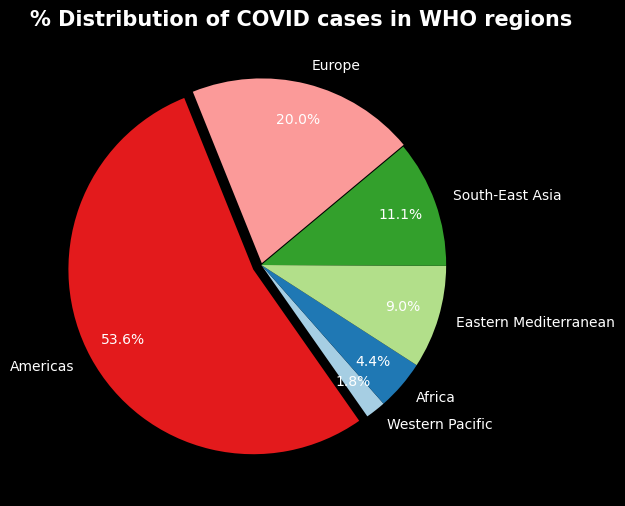

In [27]:
who_regions = covid_data.groupby('WHO Region')['Confirmed'].sum().sort_values()
explode = [0,0,0,0,0.01,0.05]
plt.figure(figsize = (10,6))
plt.style.use('dark_background')
plt.pie(who_regions.values,explode = explode,labels = who_regions.index,
        autopct = '%1.1f%%',pctdistance = 0.8,startangle = 305,
        colors = plt.cm.Paired.colors,textprops = {'fontsize':10})
plt.title('% Distribution of COVID cases in WHO regions',fontsize = 15,weight = 'bold',loc = 'left')
plt.show()


In [33]:
grouped_data_WHO_Region = covid_data.groupby('WHO Region').agg({
                                                'Confirmed': 'sum',
                                                'Deaths': 'sum',
                                                'Recovered': 'sum',
                                                'Active':'sum',
                                               'New cases':'sum',
                                               'New deaths':'sum',
                                               'New recovered':'sum'}).reset_index()
print(grouped_data_WHO_Region.tail())

              WHO Region  Confirmed  Deaths  Recovered   Active  New cases  \
1               Americas    8839286  342732    4468616  4027938     129531   
2  Eastern Mediterranean    1490744   38339    1201400   251005      12410   
3                 Europe    3299523  211144    1993723  1094656      22294   
4        South-East Asia    1835297   41349    1156933   637015      48993   
5        Western Pacific     292428    8249     206770    77409       3289   

   New deaths  New recovered  
1        3555          94776  
2         445          14843  
3         304          11732  
4         734          37582  
5          24           1127  


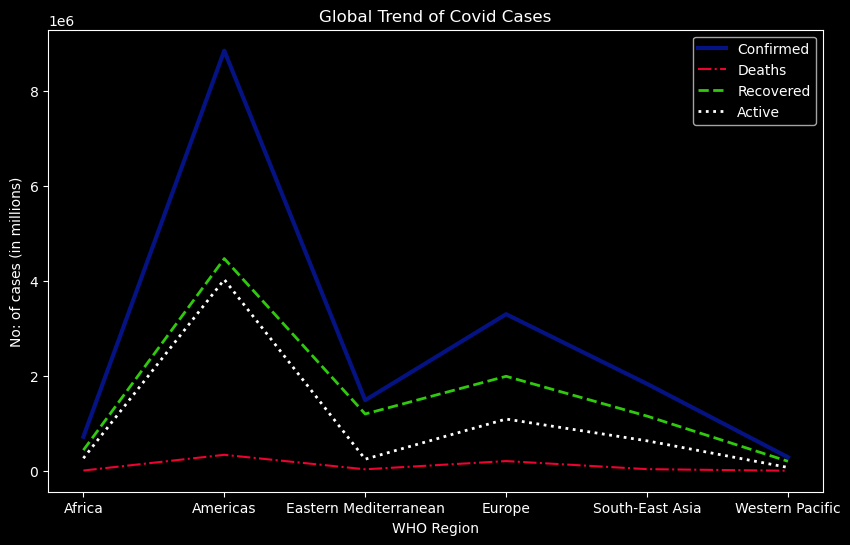

In [37]:
plt.figure(figsize = (10,6))
plt.style.use('dark_background')
# Plotting Confirmed cases
plt.plot(grouped_data_WHO_Region['WHO Region'],grouped_data_WHO_Region['Confirmed'],linestyle = '-',color = '#051282',label = 'Confirmed',lw = 3)
# Plotting Deaths
plt.plot(grouped_data_WHO_Region['WHO Region'],grouped_data_WHO_Region['Deaths'],linestyle = '-.',color = '#ed0231',label = 'Deaths')
# Plotting Recovered cases
plt.plot(grouped_data_WHO_Region['WHO Region'],grouped_data_WHO_Region['Recovered'],linestyle = '--',color = '#30c90e',label = 'Recovered',lw = 2)
# Plotting active cases
plt.plot(grouped_data_WHO_Region['WHO Region'],grouped_data_WHO_Region['Active'],linestyle = ':',color = 'w',label = 'Active',lw = 2)
plt.xlabel('WHO Region')
plt.ylabel('No: of cases (in millions)')
plt.title('Global Trend of Covid Cases')
plt.legend()
plt.show()


In [39]:
# What are the top 10 countries countries with highest number of confirmed cases, deaths and recovered cases?

country_grouped = covid_data.groupby('Country/Region').max()
country_grouped.sample(5)

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
Country/Region,,,,,,,,,,,,,,
Germany,207112,9125,190314,7673,445,1,259,4.41,91.89,4.79,203325,3787,1.86,Europe
South Korea,14203,300,13007,896,28,1,102,2.11,91.58,2.31,13816,387,2.80,Western Pacific
Cote d'Ivoire,15655,96,10361,5198,59,0,183,0.61,66.18,0.93,14312,1343,9.38,Africa
Nicaragua,3439,108,2492,839,0,0,0,3.14,72.46,4.33,3147,292,9.28,Americas
Liberia,1167,72,646,449,5,0,5,6.17,55.36,11.15,1107,60,5.42,Africa


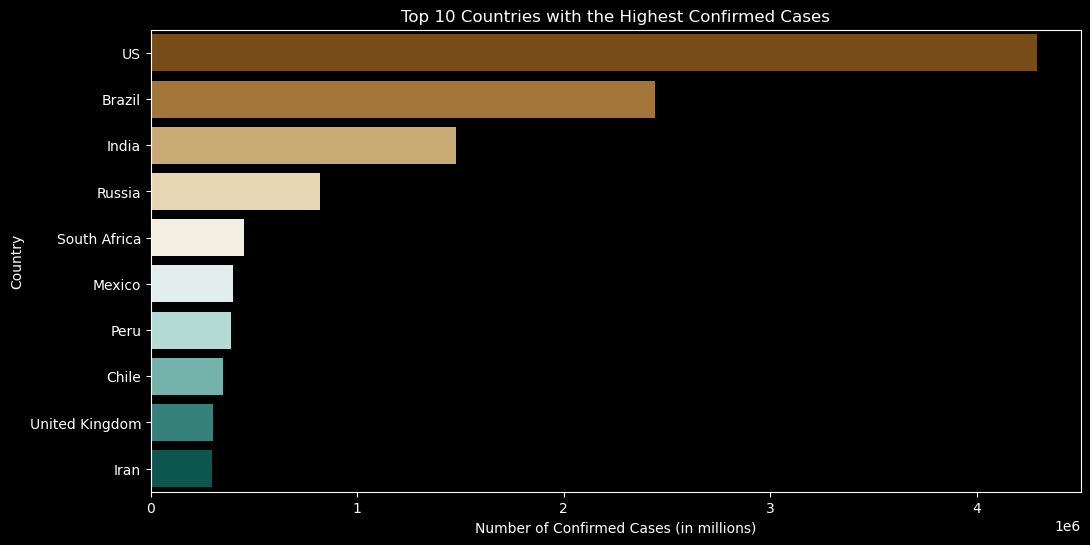

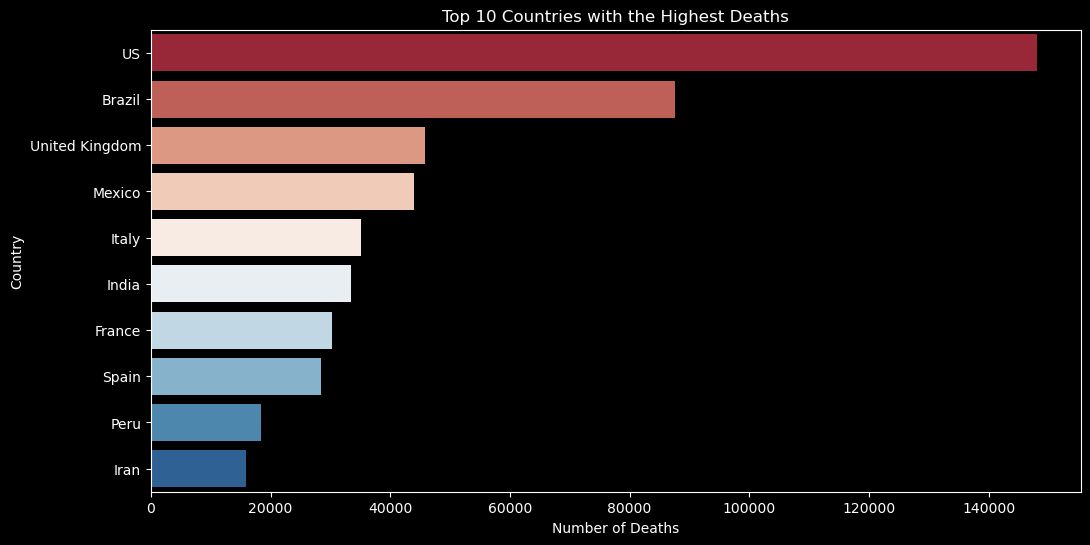

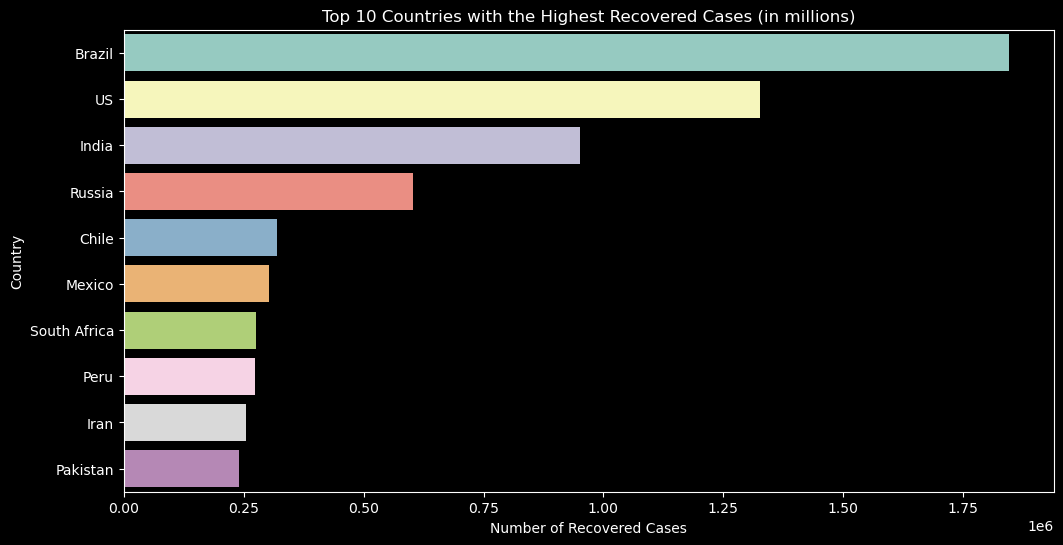

In [40]:
#nlargest function returns the first `n` rows ordered by `columns` in descending order.
#top 10 countries with highest number of confirmed covid cases
top10_confirmed = country_grouped.nlargest(10,'Confirmed')

#bar chart for confirmed cases
plt.figure(figsize = (12,6))
plt.style.use('dark_background')
sns.barplot(x = top10_confirmed['Confirmed'].sort_values(ascending = False),y = top10_confirmed.index,palette = 'BrBG')
plt.title('Top 10 Countries with the Highest Confirmed Cases')
plt.xlabel('Number of Confirmed Cases (in millions)')
plt.ylabel('Country')
plt.show()

#top 10 countries with highest number of deaths
top10_deaths = country_grouped.nlargest(10,'Deaths')

#bar chart for covid deaths
plt.figure(figsize = (12,6))
plt.style.use('dark_background')
sns.barplot(x = top10_deaths['Deaths'].sort_values(ascending = False),y = top10_deaths.index,palette = 'RdBu')
plt.title('Top 10 Countries with the Highest Deaths')
plt.xlabel('Number of Deaths')
plt.ylabel('Country')
plt.show()

#top 10 countries with highest number recoveries
top10_recovered = country_grouped.nlargest(10,'Recovered')

#bar chart for recovered cases
plt.figure(figsize = (12,6))
plt.style.use('dark_background')
sns.barplot(x = top10_recovered['Recovered'].sort_values(ascending = False),y = top10_recovered.index,palette = 'Set3')
plt.title('Top 10 Countries with the Highest Recovered Cases (in millions)')
plt.xlabel('Number of Recovered Cases')
plt.ylabel('Country')
plt.show()

In [43]:
fig = px.choropleth(covid_data, 
                    locations='Country/Region',
                    locationmode='country names',
                    color='Confirmed',
                    hover_name='Country/Region',
                    color_continuous_scale='Viridis',
                    title='COVID-19 Confirmed Cases Worldwide')

# Show the map
fig.show()

In [46]:
fig = px.choropleth(covid_data, 
                    locations='Country/Region',
                    locationmode='country names',
                    color='Deaths',
                    hover_name='Country/Region',
                    color_continuous_scale='Reds',
                    title='COVID-19 Deaths Cases Worldwide')

# Show the map
fig.show()

In [49]:
fig = px.choropleth(covid_data, 
                    locations='Country/Region',
                    locationmode='country names',
                    color='Recovered',
                    hover_name='Country/Region',
                    color_continuous_scale='Blues',
                    title='COVID-19 Recovered Cases Worldwide')

# Show the map
fig.show()

In [52]:
fig = px.sunburst(covid_data, path=['WHO Region'], title='Distribution of Cases by WHO Region')
fig.show()

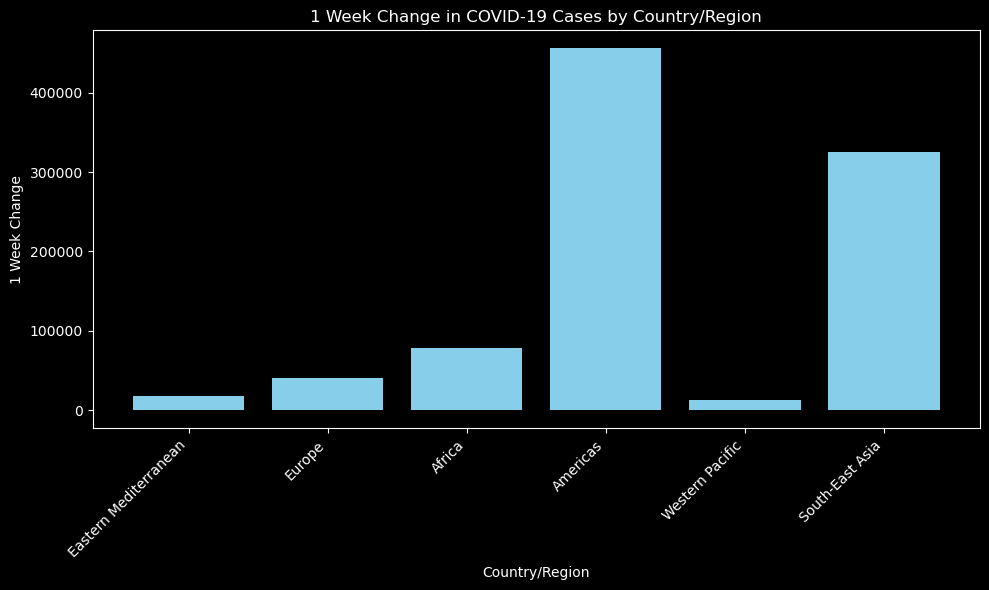

In [56]:
plt.figure(figsize=(10, 6))
plt.bar(covid_data['WHO Region'], covid_data['1 week change'], color='skyblue')
plt.xlabel('Country/Region')
plt.ylabel('1 Week Change')
plt.title('1 Week Change in COVID-19 Cases by Country/Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [59]:
Top_10_confirmed_cases_country = covid_data['Confirmed'].head(10)
Top_10_confirmed_cases_country

0     36263
1      4880
2     27973
3       907
4       950
5        86
6    167416
7     37390
8     15303
9     20558
Name: Confirmed, dtype: int64

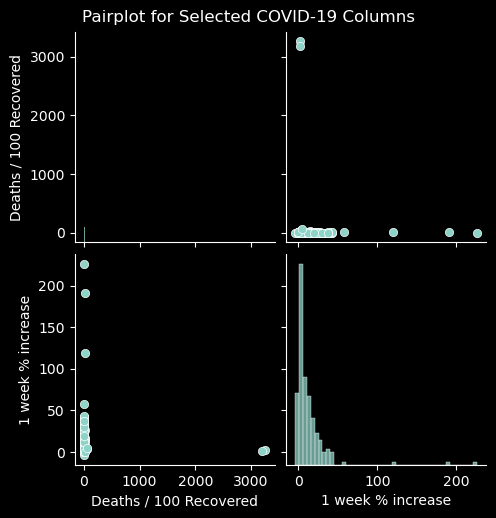

In [61]:
selected_columns = ['Deaths / 100 Recovered', '1 week % increase']
sns.pairplot(covid_data[selected_columns])
plt.suptitle('Pairplot for Selected COVID-19 Columns', y=1.02)
plt.show()

In [64]:
# Split the dataset into features and target variable
X = covid_data[['Confirmed', 'Deaths', 'Recovered', 'Active', '1 week % increase']]
y = (covid_data['New cases'] > 0).astype(int)

In [65]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Train a machine learning model (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [69]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [80]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')
print(f'Accuracy Score: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)


Mean Squared Error: 0.21
R-squared Score: -0.40
Accuracy Score: 0.79
Confusion Matrix:
[[ 2  5]
 [ 3 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.29      0.33         7
           1       0.85      0.90      0.88        31

    accuracy                           0.79        38
   macro avg       0.62      0.59      0.60        38
weighted avg       0.77      0.79      0.78        38



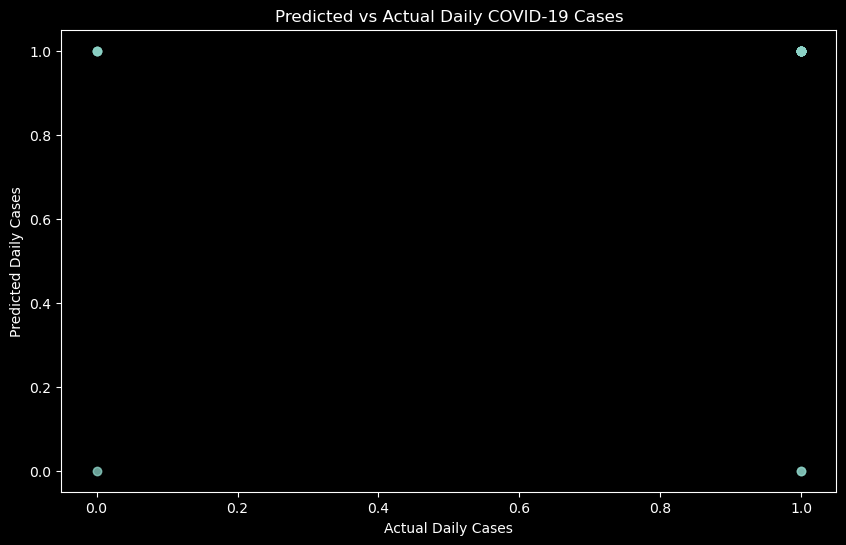

In [81]:
# Visualize predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Daily Cases')
plt.ylabel('Predicted Daily Cases')
plt.title('Predicted vs Actual Daily COVID-19 Cases')
plt.show()

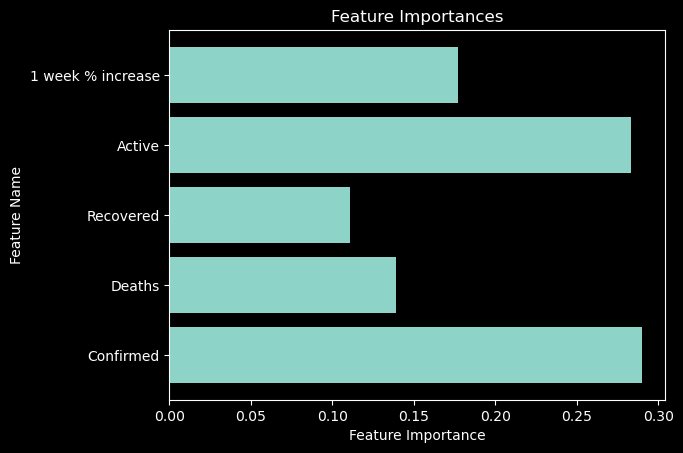

In [82]:
# Visualize feature importances
feature_importances = model.feature_importances_
feature_names = X.columns
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importances')
plt.show()